In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import statistics
import sys
import time
from tqdm import tqdm
sys.path.append(os.path.dirname(os.getcwd()))

from problems.problem_1.p1_b import stable_matching_1b

In [2]:
def create_text_inputs(size):
    # Add in the n value at start of .txt
    lines = [str(size)]
    
    # Create the lines that are a list of the integers scrambled
    for _ in range(2*size):
        lines.append(" ".join(str(element) for element in list(range(size))))
        
    # Write text input file    
    with open('input/test_p1b_student_n' + str(size) + '.txt', 'w') as f:
        for line in lines:
          f.write(line)
          f.write("\n")

In [3]:
## Get run times 

func_times = []

# List sizes
sizes = [int(i) for i in np.linspace(2, 1000, 10)]

# Get run times
for size in tqdm(sizes):
    
    func_times_single_size = []
    
    for i in range(10-1):
        # create the text file that is being used
        create_text_inputs(size)

        # set start time
        start_time = time.time()

        # run function
        stable_matching_1b('input/test_p1b_student_n' + str(size) + '.txt')

        # add time to list of times
        func_times_single_size.append(time.time() - start_time)
    
    func_times.append(statistics.median(func_times_single_size))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [04:09<00:00, 24.92s/it]


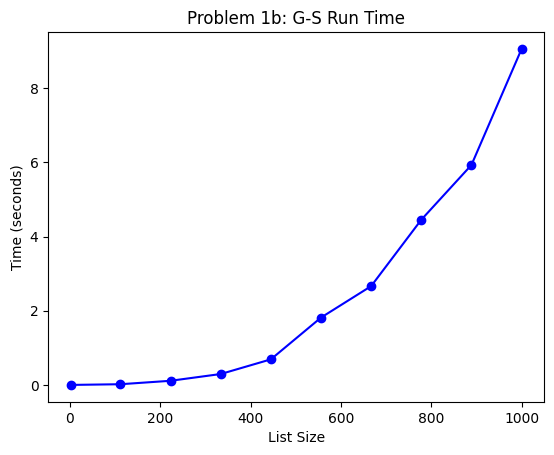

In [5]:
# Plotting
plt.plot(sizes, func_times, marker='o', label='Problem 1b', color='blue')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('List Size')
plt.ylabel('Time (seconds)')
plt.title('Problem 1b: G-S Run Time')
plt.savefig(os.path.join(os.path.dirname(os.getcwd()),'latex/figures/problem-1b.png'))